In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns
from sklearn.metrics import *

In [2]:
model_name = ['ann', 'dt', 'knn', 'nb', 'rf', 'svm','dnn', 'ednn']

In [3]:
file = os.listdir('Results')
file

['ann_fold_pred.pkl',
 'ann_fold_test.pkl',
 'dnn_fold_pred.pkl',
 'dnn_fold_test.pkl',
 'dt_fold_pred.pkl',
 'dt_fold_test.pkl',
 'ednn_fold_pred.pkl',
 'ednn_fold_test.pkl',
 'IMG',
 'knn_fold_pred.pkl',
 'knn_fold_test.pkl',
 'nb_fold_pred.pkl',
 'nb_fold_test.pkl',
 'rf_fold_pred.pkl',
 'rf_fold_test.pkl',
 'svm_fold_pred.pkl',
 'svm_fold_test.pkl',
 'temp.npy']

In [28]:
k = model_name[7]
pkl = open(f'Results/{k}_fold_pred.pkl', 'rb')
pkl2 = open(f'Results/{k}_fold_test.pkl', 'rb')
fold_pred = pickle.load(pkl)
fold_test = pickle.load(pkl2)

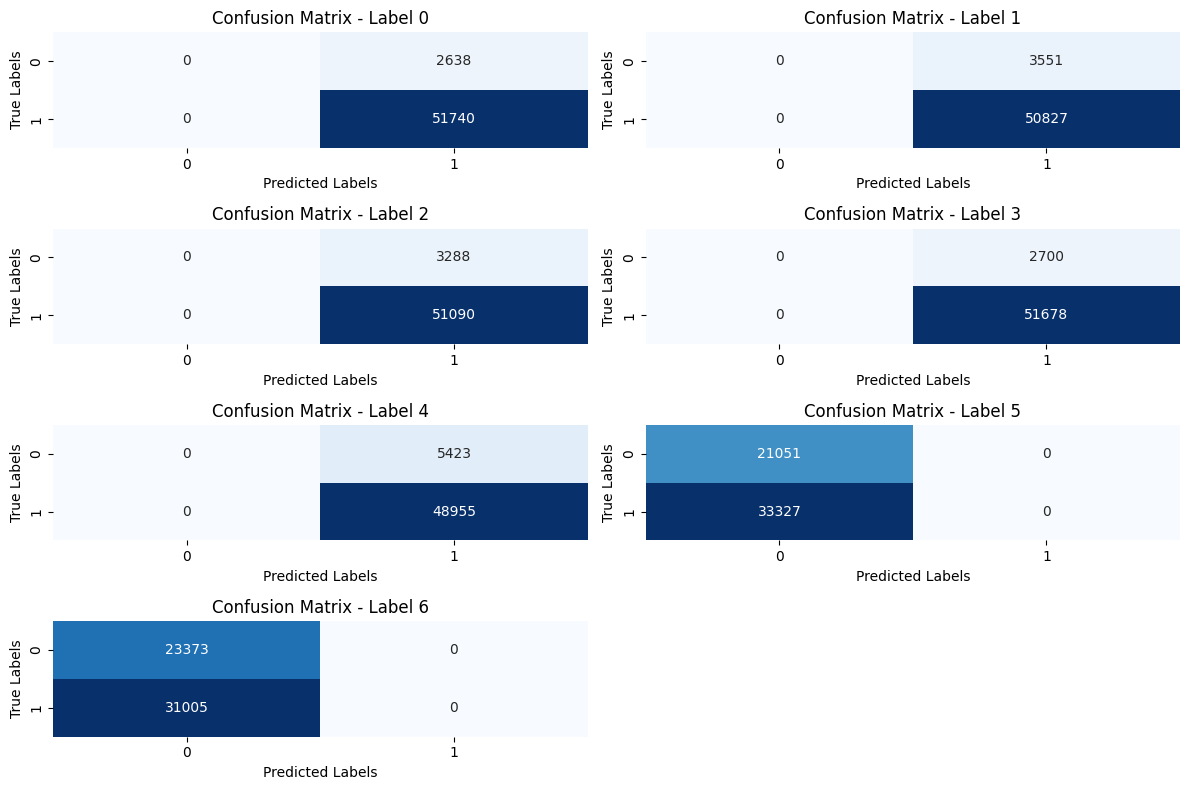

In [29]:
if isinstance(fold_pred[0], np.ndarray):
    cm = multilabel_confusion_matrix(fold_test[0].round(), fold_pred[0].round())
else:
    cm = multilabel_confusion_matrix(fold_test[0].round(), fold_pred[0].toarray().round())
# Determine the grid dimensions for subplots
num_labels = cm.shape[0]
cols = min(num_labels, 2)
rows = (num_labels + cols - 1) // cols

# Plot confusion matrix
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (matrix, ax) in enumerate(zip(cm, axes.ravel())):
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Label {i}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Remove unused subplots if necessary
if num_labels < rows * cols:
    for j in range(num_labels, rows * cols):
        fig.delaxes(axes.ravel()[j])

plt.tight_layout()
plt.savefig(f'Results/IMG/{k}_CM.png')
plt.show()

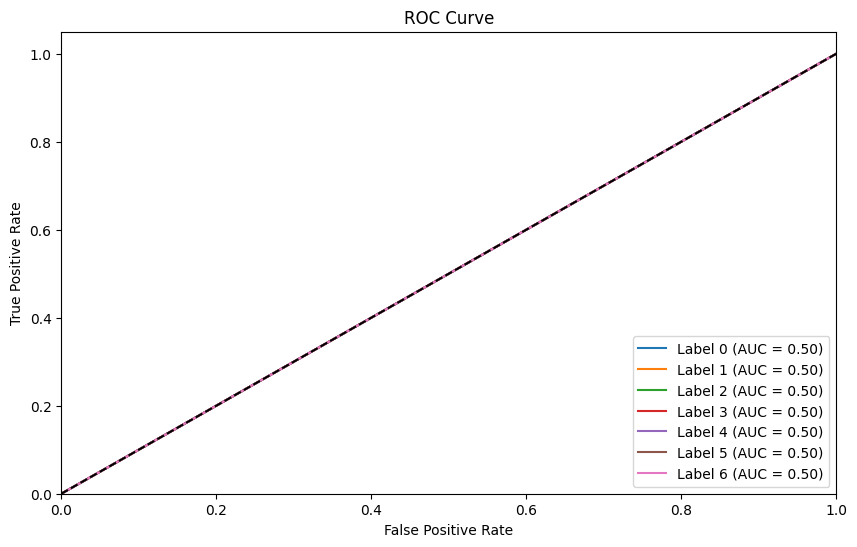

In [30]:
plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
#predictions=preds
for i in range(fold_pred[0].shape[1]):
    if isinstance(fold_pred[0], np.ndarray):
        fpr, tpr, _ = roc_curve(fold_test[0][:, i], fold_pred[0][:, i]) 
        roc_auc_per_label[i] = roc_auc_score(fold_test[0][:, i], fold_pred[0][:, i])
    else:
        fpr, tpr, _ = roc_curve(fold_test[0][:, i], fold_pred[0].toarray()[:, i]) 
        roc_auc_per_label[i] = roc_auc_score(fold_test[0][:, i], fold_pred[0].toarray()[:, i])
    
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))
# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig(f'Results/IMG/{k}_ROC.png')
plt.show()